# Machine Learning Project 

Alexandra West

## Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from scipy.ndimage.filters import gaussian_filter

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
from sklearn.datasets import fetch_openml
X, Y = fetch_openml('mnist_784', return_X_y=True , cache=False)
Y = Y.astype(int)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

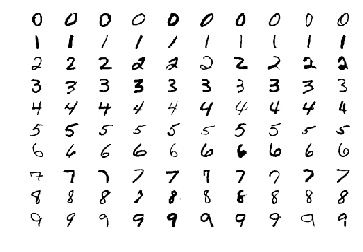

In [3]:
def P1(num_examples=10):

### STUDENT START ###

    # set image parameters, color and size
    plt.rc('image', cmap = 'Greys')
    
    # For each unique Y (each digit from 0 to 9)
    for i in np.nditer(np.unique(mini_train_labels)):
        
        # Create an array with the features of "num_examples" of digit "i"
        array = mini_train_data[mini_train_labels == i][:num_examples]
        
        # For each of the "num_examples" 
        for j in range(num_examples):
            
            # Create subplots (from 1 to "i * num_examples + j + 1" of each digit)
            plt.subplot(len(np.unique(mini_train_labels)), num_examples, i * num_examples + j + 1)
            
            # Hide axis and tickmarks
            plt.axis('off')
            
            # Plot the digit (reshaped)
            digit = array[j].reshape(28,28)            
            plt.imshow(digit)
    
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###
    
    for k in k_values:
        
        # Create a model
        KNN_model = KNeighborsClassifier(n_neighbors=k)
        
        # Fit the model using the mini training set
        KNN_model.fit(mini_train_data, mini_train_labels)
        
        # Predict the model using the dev set
        dev_predicted_labels = KNN_model.predict(dev_data)
        
        # Report accuracy on the dev set
        print ('Accuracy using k =', k, 'neighbors: ', KNN_model.score(dev_data, dev_labels))
        
        # For k=1, show precision, recall, and F1 for each label.
        if k == 1:
            labels = np.unique(Y).astype(int).astype('S')
            print ('\nPrecision, recall, and F1 for each digit when k = 1:')
            print (classification_report(dev_labels, dev_predicted_labels, target_names = labels))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy using k = 1 neighbors:  0.884

Precision, recall, and F1 for each digit when k = 1:
              precision    recall  f1-score   support

        b'0'       0.95      0.95      0.95       106
        b'1'       0.89      0.98      0.93       118
        b'2'       0.90      0.79      0.84       106
        b'3'       0.93      0.87      0.90        97
        b'4'       0.91      0.85      0.88        92
        b'5'       0.86      0.88      0.87        88
        b'6'       0.92      0.92      0.92       102
        b'7'       0.85      0.94      0.89       102
        b'8'       0.83      0.77      0.80        94
        b'9'       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Accuracy using k = 3 neighbors:  0.876
Accuracy using k = 5 neighbors:  0.882
Accuracy using k = 7 neighbors:  0.877
Accuracy using k = 9 neighbors:

**ANSWER**: 8 appears to be the most difficult digit to classify using this model (using k=1 and the dev set). While other numbers have low recall as well (such as 2) or low precision (such as 9) - the F1 score takes both into account and shows that 8 is the most difficult to classify. This makes sense intuitively, as there are many ways that handwriting shows an 8, and arguably an 8 has the most 'on' pixels so could be confused with many different digits.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    
    # Create an empty list for time elapsed
    time_elapsed = []
    
    # Create a k nearest neighbors model where k = 1
    NN_model = KNeighborsClassifier(n_neighbors=1)
    
    # for each training set size
    for size in train_sizes:
        
        # start timing
        start = time.time()
        
        # Fit the model with the set corresponding to the size of training data 'size'
        time_train_data, time_train_labels = train_data[:size], train_labels[:size]
        NN_model.fit(time_train_data, time_train_labels)
        
        # Append accuracy to the list created below
        accuracies.append(NN_model.score(dev_data, dev_labels))
        
        # end timing
        end = time.time()
        
        # calculate total time spent fitting and reporting the model and append to time elapsed list
        time_elapsed.append(end - start)
        
    # format the answer using the three lists
    for s, a, t in zip(train_sizes, accuracies, time_elapsed):
        print ('Training size = ', s, 'Accuracy = ', a, 'Time elapsed = ', t)

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Training size =  100 Accuracy =  0.702 Time elapsed =  0.14836621284484863
Training size =  200 Accuracy =  0.791 Time elapsed =  0.2645907402038574
Training size =  400 Accuracy =  0.811 Time elapsed =  0.5084228515625
Training size =  800 Accuracy =  0.866 Time elapsed =  1.0584771633148193
Training size =  1600 Accuracy =  0.905 Time elapsed =  2.1331441402435303
Training size =  3200 Accuracy =  0.927 Time elapsed =  4.208132982254028
Training size =  6400 Accuracy =  0.939 Time elapsed =  8.490893125534058
Training size =  12800 Accuracy =  0.952 Time elapsed =  17.366554975509644
Training size =  25000 Accuracy =  0.962 Time elapsed =  37.17223310470581


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:
def P4():

### STUDENT START ###
    # Transpose the features (train_sizes) and labels (accuracies) using np.newaxis, 
    # increasing the dimension of 1D arrays into column vectors
    X = np.array(train_sizes)[:,np.newaxis]
    y = np.array(accuracies)[:,np.newaxis]
        
    # create regression model
    regression_model = LinearRegression()
    # fit regression model
    regression_model.fit(X, y)
    
    # report accuracy for n = 60000
    n = np.array([[60000]])
    linear_predict = regression_model.predict(n)
    print ('Accuracy for n = 60000, linear regression:', linear_predict[0][0])

    # Try a log transformation
    LogX = np.log10(X)
    regression_model.fit(LogX, y)
    log_n = np.log10([[60000]])
    log_predict = regression_model.predict(log_n)
    print ('Accuracy for n = 60000 log transformation:', log_predict[0][0])
    
    # Try a log-log transformation
    LogLogX = np.log10(np.log10(X))
    regression_model.fit(LogLogX, y)
    log_log_n = np.log10(np.log10([[60000]]))
    log_log_predict = regression_model.predict(log_log_n)
    print ('Accuracy for n = 60000 log-log transformation:', log_log_predict[0][0])

### STUDENT END ###
P4()

Accuracy for n = 60000, linear regression: 1.2446923405015076
Accuracy for n = 60000 log transformation: 1.0337099653785085
Accuracy for n = 60000 log-log transformation: 1.0115075042575419


**ANSWER**: The linear model predicts accuracy greater than 1 - which is nonsensical. A linear model therefore doesn't fit the data well. The logarithm of x is a much better fit, and the log-log transformation is even better. However, the predicted value for n=60000 is still above 1. 

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Numeric representation of Confusion Matrix: 
 [[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


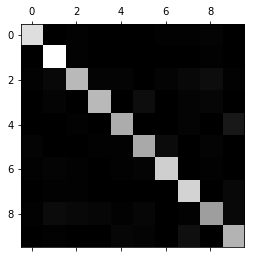

most classified correctly, but need to compare error rates instead of absolute number of errors


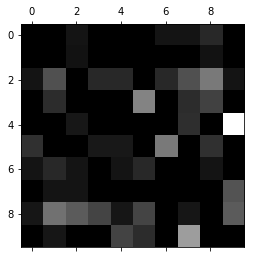

now you can clearly see all the errors the classifier makes

Some examples of individual errors:
5 cases in which the digit 4 is confused with the digit 9.
5 cases in which the digit 9 is confused with the digit 7.
5 cases in which the digit 3 is confused with the digit 5.
5 cases in which the digit 5 is confused with the digit 6.
5 cases in which the digit 2 is confused with the digit 8.


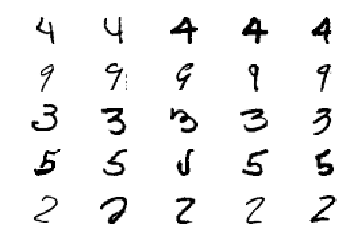

In [7]:
def P5():

### STUDENT START ###

    # Create a k nearest neighbors model where k = 1
    NN_model = KNeighborsClassifier(n_neighbors=1)
    
    # Fit the model with the mini training set
    NN_model.fit(mini_train_data, mini_train_labels)
    
    # Create a confusion matrix for the dev data
    conf_mx = confusion_matrix(dev_labels, NN_model.predict(dev_data))
    print ("Numeric representation of Confusion Matrix: \n", conf_mx)
    
    # the matrix is confusing with just numbers, print image of the matrix
    plt.matshow(conf_mx, cmap='gray')
    plt.show()
    print ("most classified correctly, but need to compare error rates instead of absolute number of errors")
    
    # comparing error rates rather than absolute number of errors
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    
    # fill the diagonal with zeroes to keep only the errors and plot the result
    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap='gray')
    plt.show()
    print ("now you can clearly see all the errors the classifier makes")
    
    # show some examples of individual errors, displaying the top num_examples of confused pairs
    print ("\nSome examples of individual errors:")
    num_confused_pairs = 5
    num_examples = 5
    
    for i in range(num_confused_pairs):
        # Find the position of the top left confused pair
        row,col = np.unravel_index(norm_conf_mx.argmax(), norm_conf_mx.shape)
        
        # the row corresponds to the true digit and column to the (wrongly) predicted digit in the dev data
        features_confused_digit = dev_data[(dev_labels == row) & (NN_model.predict(dev_data) == col)]
        
        # shuffle to show different digits each time
        np.random.shuffle(features_confused_digit)
        
        print ('5 cases in which the digit {1:d} is confused with the digit {2:d}.'.
               format(conf_mx.max(), row, col))
        
        for j in range(num_examples):
            # create subplot using the same method as P(1)
            plt.subplot(num_confused_pairs, num_examples, i*num_examples + j + 1)
                                  
            # plot the corresponding digit (reshaped)
            confused_digit = features_confused_digit[j].reshape(28,28)
            plt.axis('off')
            plt.imshow(confused_digit, cmap = 'Greys')
            
        # delete the image just shown in order to move on to the next pair
        norm_conf_mx[row,col] = 0    
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Accuracy for unpreprocessed dev data with unpreprocessed train data: 0.884
Accuracy for unpreprocessed dev data with preprocessed train data: 0.89
Accuracy for preprocessed dev data with unpreprocessed train data: 0.88
Accuracy for preprocessed dev data with preprocessed train data: 0.896


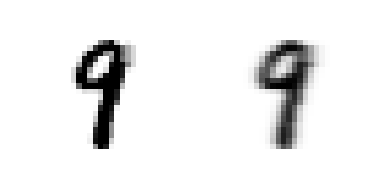

In [9]:
def P6():
    
### STUDENT START ###
     
    # Create a 1NN model
    KNN_model = KNeighborsClassifier(n_neighbors=1)
    
    # Blur both training and dev data (with sigma = 1) 
    blurred_train = np.apply_along_axis(gaussian_filter, 1, mini_train_data, 1)
    blurred_dev = np.apply_along_axis(gaussian_filter, 1, dev_data, 1)
    
    # Analyze the 4 possible cases
    # (1) Base case: blur neither train nor dev data 
    KNN_model.fit(mini_train_data, mini_train_labels)
    print ('Accuracy for unpreprocessed dev data with unpreprocessed train data:', 
            KNN_model.score(dev_data, dev_labels))
    
    # (2) preprocess the training data but not the dev data
    KNN_model.fit(blurred_train, mini_train_labels)
    print ('Accuracy for unpreprocessed dev data with preprocessed train data:', 
            KNN_model.score(dev_data, dev_labels))
   
    # (3) preprocess the dev data but not the training data
    KNN_model.fit(mini_train_data, mini_train_labels)
    print ('Accuracy for preprocessed dev data with unpreprocessed train data:',
            KNN_model.score(blurred_dev, dev_labels))
   
    # (4) preprocess both training and dev data
    KNN_model.fit(blurred_train, mini_train_labels)
    print ('Accuracy for preprocessed dev data with preprocessed train data:',
            KNN_model.score(blurred_dev, dev_labels))
        
    # Plot a random digit next to its blurred version
    random_image = X[np.random.choice(X.shape[0])]
    plt.rc('image', cmap='Greys')
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.imshow(random_image.reshape(28,28))
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.imshow(gaussian_filter(random_image,1).reshape(28,28))
    
### STUDENT END ###

P6()

**ANSWER**:  With unprocessed training and development data as the base case, accuracy improves when just the training data is preprocessed, and is optimized when both the training data and development data is preprocessed to be 'blurry'. It is slightly worse when just the development data are preprocessed. When blurring the data, the examples are easier to generalize, so it makes sense that accuracy is optimized when both training and dev data is preprocessed; this is the opposite of overfitting the data and might correct for some of that error.


(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [10]:
def P7():

### STUDENT START ###

    # Create a binomial Naive Bayes model, using function argument first
    BinomialNB_model = BernoulliNB(binarize=0.5)
    
    # Fit the binomial Naive Bayes model using mini train data
    BinomialNB_model.fit(mini_train_data, mini_train_labels)
   
    # report accuracy using dev data
    print ('Accuracy of Binomial NB:', BinomialNB_model.score(dev_data, dev_labels))
    
    # Create a multinomial Naive Bayes model
    MultinomialNB_model = MultinomialNB()
    
    # Map the pixels to 0, 1, 2 
    multiclass_train_data = np.where((mini_train_data > 0.333) & (mini_train_data < 0.667), 1, 
                                     np.where(mini_train_data > 0.333, 2, 0))
    multiclass_dev_data = np.where((dev_data > 0.333) & (dev_data < 0.667), 1, 
                                   np.where(dev_data > 0.333, 2, 0))
    
    # fit the multi-class model
    MultinomialNB_model.fit(multiclass_train_data, mini_train_labels)
    
    # report on accuracy of mulitnomial Naive Bayes
    print ('Accuracy of Multinomial NB:', MultinomialNB_model.score(multiclass_dev_data, dev_labels))
    
### STUDENT END ###

P7()

Accuracy of Binomial NB: 0.819
Accuracy of Multinomial NB: 0.815


**ANSWER**: The multi-nomial version does not improve the results. Even changing the thresholds (to 0.25 and 0.75 for example) lowers the accuracy of the mulinomial model. Binarizing the data filters noise, so the image is more precise and defined - and increases the probability of the label given the feature. Adding more categories decreases the accuracy.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [11]:
def P8(alphas):

### STUDENT START ###
    
    # set model and parameters for GridSearchCV 
    mod = BernoulliNB()
    para = [{'alpha': alphas['alpha']}]
    
    # fit model using GridSearch
    g_s = GridSearchCV(mod, para, cv=2)
    g_s.fit(mini_train_data, mini_train_labels)
    print ('top score:', g_s.score(dev_data, dev_labels), '\n')

    results = g_s.cv_results_
    
    for i in range(len(alphas['alpha'])):
        print ('For Alpha =', results['params'][i]['alpha'], 'Test Score =', results['mean_test_score'][i], 
               'Rank =', results['rank_test_score'][i])
            
    return g_s

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/Users/alexwest/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/alexwest/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


top score: 0.822 

For Alpha = 0.0 Test Score = 0.79 Rank = 8
For Alpha = 0.0001 Test Score = 0.813 Rank = 6
For Alpha = 0.001 Test Score = 0.814 Rank = 5
For Alpha = 0.01 Test Score = 0.818 Rank = 2
For Alpha = 0.1 Test Score = 0.822 Rank = 1
For Alpha = 0.5 Test Score = 0.817 Rank = 3
For Alpha = 1.0 Test Score = 0.815 Rank = 4
For Alpha = 2.0 Test Score = 0.803 Rank = 7
For Alpha = 10.0 Test Score = 0.76 Rank = 9


In [12]:
print (nb.best_params_)

{'alpha': 0.1}


**ANSWER**: The best alpha value is 0.1. From about alpha = 0.0001, accuracy follows a parabola that reaches its max (0.82) when alpha = 0.1. Alpha = 0 means there is no LaPlace smoothing happening at all - therefore there are a lot of 0s still there in the data, we are multiplying by 0, and the math doesn't make sense. The warning is telling us that 0 would not work, and would result in this very issue.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [13]:
def P9():

### STUDENT START ###

    # Create a Gaussian NB model
    GNB_model = GaussianNB()
    
    # Fit the model with the mini_train_data
    GNB_model.fit(mini_train_data, mini_train_labels)
    
    # Report accuracy for the dev set
    print ('Accuracy of regular Gaussian NB:', GNB_model.score(dev_data,dev_labels))

    # Which value of sigma maximizes accuracy? 
    # Define range of sigmas and an array of accuracies in the same shape - choosing something reasonable
    # because data is a bunch of 0s and 1s
    sigmas = np.arange(0.05, 1.05, 0.05)
    accuracies = np.zeros(sigmas.shape)
    
    # For each sigma value, create a new train_data set and new dev_data set that contains random noise
    for i in range(sigmas.shape[0]):
        new_train_data = mini_train_data + np.random.normal(0, sigmas[i], mini_train_data.shape)
        new_dev_data = dev_data + np.random.normal(0, sigmas[i], mini_train_data.shape)
        
        # fit the GNB model to the train set
        GNB_model.fit(new_train_data, mini_train_labels)
        
        # score the accuracy with that particular value of sigma
        accuracies[i] = GNB_model.score(new_dev_data, dev_labels)
        
    # keep value of sigma for which the accuracy is highest
    sigma = sigmas[accuracies.argmax()]
    
    print ('Best sigma:', sigma)
    
    # Use the best value of sigma to create new training and dev data sets with random noise
    new_train_data = mini_train_data + np.random.normal(0, sigma, mini_train_data.shape)
    new_dev_data = dev_data + np.random.normal(0, sigma, mini_train_data.shape)
    
    # then fit the GNB model with the noisy data and score it
    GNB_model.fit(new_train_data, mini_train_labels)
    
    print ('Accuracy of GaussianNB with noise added to data using best sigma:', 
           GNB_model.score(new_dev_data, dev_labels))
    
    return GNB_model

### STUDENT END ###

gnb = P9()

Accuracy of regular Gaussian NB: 0.593
Best sigma: 0.2
Accuracy of GaussianNB with noise added to data using best sigma: 0.833


**ANSWER**: A Guassian Naive Bayes is a special type of machine learning algorithm because it expects a normal distribution of features. In this case it won't work with the mini training data set, because we have already binarized the data to be between 0 and 1 (mostly 0s, as the majority of the images are empty). This is why the Binomial Naive Bayes model worked better. By adding Guassian noise (mean = 0, and std deviation that maximizes accuracy on the dev set) to both mini_train_data and dev_data, the distribution is closer to normal, and the model has an accuracy closer to Binomial Naive Bayes.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

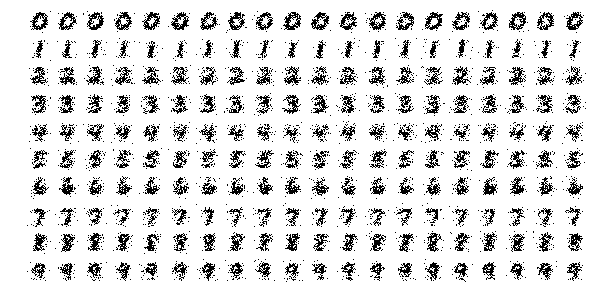

In [14]:
def P10(num_examples):

### STUDENT START ###

    # create a Bernoulli Naive Bayes model
    model = BernoulliNB()
    
    # fit the model using mini_train data
    model.fit(mini_train_data, mini_train_labels)
    
    # estimated probability of each pixel - converted from log probability back to regular probability
    probs = np.exp(model.feature_log_prob_)
    
    # define figure size
    plt.figure(figsize=(10, 5))
    
    # For each digit (from 0 to 9 - the unique values of mini_train_labels)
    for i in range(len(np.unique(mini_train_labels))):
        
        # create an array with the features of "num_examples" of digit "i"
        # for each of the "num_examples" 
        
        for j in range(num_examples):
            # Generate an example digit using random numbers 
            example = np.where(probs[i, :] > np.random.rand(mini_train_data.shape[1]), 1, 0)
            
            # Create subplot from 1 to "num_digits"*"num_examples" of each digit
            plt.subplot(len(np.unique(mini_train_labels)), num_examples, i * num_examples + j + 1)
            
            # Plot the corresponding digit
            digit = example.reshape((28,28))
            plt.axis('off')
            plt.imshow(digit, cmap = 'Greys')

### STUDENT END ###

P10(20)

**ANSWER**: The generated digits are fuzzier than the training digits, but it is still possible to distinguish each digit. In addition, they have less variability from example to example. This is using the probabilities to place dots in places where the probability is greater than 0. It makes the digits fuzzy but recognizable.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [15]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    # Create a Binomial NB model using the best value of alpha defined by best_params_
    BNB_model = BernoulliNB(alpha = nb.best_params_['alpha'])
    
    # Fit it with the mini training set
    BNB_model.fit(mini_train_data, mini_train_labels)
    
    # Predict labels and probabilities of dev set
    dev_predict_labels = BNB_model.predict(dev_data)
    dev_predict_probs = BNB_model.predict_proba(dev_data)
    
    # Define an auxialiary variable: buckets_copy 
    buckets_copy = buckets.copy()
    
    # insert into buckets_copy so that list includes first prior value (0) 
    buckets_copy.insert(0, 0.)
    
    # For each bucket (can change based on input)
    for i in range(1, len(buckets) + 1):
        
        # Create array of 0s the shape of the dev_predict_labels
        # from 1 to len(buckets), use buckets_copy to compare probabilities
        label_in_bucket = np.zeros(dev_predict_labels.shape[0])
        
        # Start counting
        count_correct = 0
        count_total = 0
        
        # For every prediction - each item in dev set to 1000
        for j in range(dev_predict_probs.shape[0]):
            # Find the maximum posterior probability (whether it corresponds to the correct label or not)
            prob = dev_predict_probs[j, dev_predict_probs[j].argmax()]
            
            # Is that maximum posterior probability inside the current bucket? 
            label_in_bucket[j] = np.where((prob <= buckets_copy[i]) & (prob > buckets_copy[i-1]), 1, 0)
            
            # If the maximum posterior probability is inside the current bucket 
            if label_in_bucket[j] == 1:
                # increase count of total
                count_total +=1
                
                # If prediction was correct
                if dev_predict_labels[j] == dev_labels[j]:
                    # increase count of correct
                    count_correct += 1
                    
        # Count of total and correct cases - make float to allow for non-integer division
        correct[i-1] = float(count_correct)
        total[i-1] = float(count_total)
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  32    accuracy = 0.344
p(pred) <= 0.9990000000000    total =  71    accuracy = 0.451
p(pred) <= 0.9999900000000    total =  65    accuracy = 0.508
p(pred) <= 0.9999999000000    total =  49    accuracy = 0.592
p(pred) <= 0.9999999990000    total =  55    accuracy = 0.764
p(pred) <= 0.9999999999900    total =  35    accuracy = 0.800
p(pred) <= 0.9999999999999    total =  48    accuracy = 0.812
p(pred) <= 1.0000000000000    total = 645    accuracy = 0.943


**ANSWER**: The classifier is not perfectly calibrated. Posterior and accuracy are not always positively correlated; specifically looking at the accuracies above - they fluctuate instead of continually improving. Higher confidence does not always imply a higher accuracy, so it is difficult to use the posterior to infer something about the accuracy of the classifer. 

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()